<a href="https://colab.research.google.com/github/Akash-mahandargi/Basic-Projects-/blob/main/Association_rules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset (no headers)
df = pd.read_excel("/content/Online retail.xlsx", header=None)

# Show the first few transactions
df.head()


,0
0,"shrimp,almonds,avocado,vegetables mix,green gr..."
1,"burgers,meatballs,eggs"
2,chutney
3,"turkey,avocado"
4,"mineral water,milk,energy bar,whole wheat rice..."


In [ ]:
"milk,bread,butter"


'milk,bread,butter'

In [ ]:
transactions = df[0].apply(lambda x: x.split(','))
transactions = transactions.tolist()  # Convert to list of lists


In [ ]:
!pip install mlxtend  # Only once if not installed

from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

df_encoded = pd.DataFrame(te_ary, columns=te.columns_)
df_encoded.head()


,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
from mlxtend.frequent_patterns import apriori

# Find frequent itemsets with min support of 3%
frequent_itemsets = apriori(df_encoded, min_support=0.03, use_colnames=True)

# Show top results
frequent_itemsets.sort_values(by='support', ascending=False).head()


,support,itemsets
25,0.238368,(mineral water)
11,0.179709,(eggs)
31,0.174110,(spaghetti)
13,0.170911,(french fries)
7,0.163845,(chocolate)


from matplotlib import pyplot as plt
_df_20['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21['support'].plot(kind='hist', bins=20, title='support')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_22.groupby('itemsets').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='index', y='support', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_24['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['support'].plot(kind='line', figsize=(8, 4), title='support')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_26['itemsets'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_26, x='index', y='itemsets', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_27['itemsets'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_27, x='support', y='itemsets', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
from mlxtend.frequent_patterns import association_rules

# Assuming `frequent_itemsets` was generated using Apriori
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Show only rules with high confidence (e.g. > 0.5)
rules = rules[ (rules['confidence'] > 0.5) & (rules['lift'] > 1) ]

# Display top 10 rules
rules.sort_values(by='lift', ascending=False).head(10)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski


In [2]:
import pandas as pd

# Load the dataset (no headers)
df = pd.read_excel("/content/Online retail.xlsx", header=None)

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:")
print(df.duplicated().sum())

# Remove duplicate rows if they exist
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print(f"\nDuplicate rows removed. New number of rows: {len(df)}")
else:
    print("\nNo duplicate rows found.")

Missing values per column:
0    0
dtype: int64

Number of duplicate rows:
2325

Duplicate rows removed. New number of rows: 5176


In [5]:
# Convert transactions to a list of lists
transactions = df[0].apply(lambda x: x.split(','))
transactions = transactions.tolist()

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Re-encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets with a lower min support
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)

# Generate association rules with lift and a minimum threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filter rules for higher confidence and lift
rules = rules[ (rules['confidence'] > 0.2) & (rules['lift'] > 1) ]

# Display top rules sorted by lift
rules.sort_values(by='lift', ascending=False).head(10)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
424,(whole wheat pasta),(olive oil),0.040572,0.087713,0.011012,0.271429,3.094525,1.0,0.007454,1.252159,0.705471,0.093904,0.201380,0.198490
298,(herb & pepper),(ground beef),0.066461,0.135819,0.022798,0.343023,2.525588,1.0,0.013771,1.315390,0.647056,0.127018,0.239769,0.255438
735,"(mineral water, shrimp)",(frozen vegetables),0.033617,0.129830,0.010433,0.310345,2.390394,1.0,0.006068,1.261747,0.601893,0.068182,0.207448,0.195351
718,"(frozen vegetables, spaghetti)",(ground beef),0.039026,0.135819,0.012558,0.321782,2.369196,1.0,0.007257,1.274194,0.601386,0.077381,0.215190,0.207122
804,"(milk, spaghetti)",(olive oil),0.050039,0.087713,0.010240,0.204633,2.332999,1.0,0.005851,1.147002,0.601464,0.080303,0.128162,0.160687
716,"(ground beef, frozen vegetables)",(spaghetti),0.024536,0.229521,0.012558,0.511811,2.229911,1.0,0.006926,1.578240,0.565425,0.052000,0.366383,0.283262
792,"(mineral water, soup)",(milk),0.033423,0.170015,0.012365,0.369942,2.175933,1.0,0.006682,1.317315,0.559115,0.064712,0.240880,0.221335
464,"(eggs, french fries)",(burgers),0.046368,0.113794,0.011399,0.245833,2.160328,1.0,0.006122,1.175079,0.563223,0.076623,0.148994,0.173002
769,"(mineral water, spaghetti)",(ground beef),0.085008,0.135819,0.024730,0.290909,2.141885,1.0,0.013184,1.218717,0.582651,0.126108,0.179465,0.236493
734,"(mineral water, frozen vegetables)",(shrimp),0.050425,0.098918,0.010433,0.206897,2.091595,1.0,0.005445,1.136147,0.549610,0.075104,0.119832,0.156183


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [6]:
# Display top 20 rules sorted by lift for examination
print("Top 20 Association Rules by Lift:")
display(rules.sort_values(by='lift', ascending=False).head(20))

# Display top 20 rules sorted by confidence for examination
print("\nTop 20 Association Rules by Confidence:")
display(rules.sort_values(by='confidence', ascending=False).head(20))

# Further analysis: Filter rules for specific interesting item combinations if needed
# For example, rules involving 'mineral water' and 'spaghetti'
# interesting_rules = rules[rules['antecedents'].apply(lambda x: 'mineral water' in x) &
#                           rules['consequents'].apply(lambda x: 'spaghetti' in x)]
# print("\nRules involving Mineral Water and Spaghetti:")
# display(interesting_rules.sort_values(by='lift', ascending=False))

# Summarize observations
print("\nObservations based on Association Rules:")
print("- Rules with high lift indicate that the occurrence of the antecedent strongly increases the likelihood of the consequent appearing together in a transaction, more than expected by chance.")
print("- High confidence suggests a strong likelihood of the consequent being purchased when the antecedent is purchased.")
print("- We can observe frequent pairings of items like 'mineral water', 'spaghetti', 'eggs', 'milk', 'chocolate', and 'french fries' which are common grocery items.")
print("- Higher lift values for less common item combinations might reveal more interesting or unexpected purchasing patterns.")
print("- The support values show the overall popularity of the itemsets involved in the rules.")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Top 20 Association Rules by Lift:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
424,(whole wheat pasta),(olive oil),0.040572,0.087713,0.011012,0.271429,3.094525,1.0,0.007454,1.252159,0.705471,0.093904,0.201380,0.198490
298,(herb & pepper),(ground beef),0.066461,0.135819,0.022798,0.343023,2.525588,1.0,0.013771,1.315390,0.647056,0.127018,0.239769,0.255438
735,"(mineral water, shrimp)",(frozen vegetables),0.033617,0.129830,0.010433,0.310345,2.390394,1.0,0.006068,1.261747,0.601893,0.068182,0.207448,0.195351
718,"(frozen vegetables, spaghetti)",(ground beef),0.039026,0.135819,0.012558,0.321782,2.369196,1.0,0.007257,1.274194,0.601386,0.077381,0.215190,0.207122
804,"(milk, spaghetti)",(olive oil),0.050039,0.087713,0.010240,0.204633,2.332999,1.0,0.005851,1.147002,0.601464,0.080303,0.128162,0.160687
716,"(ground beef, frozen vegetables)",(spaghetti),0.024536,0.229521,0.012558,0.511811,2.229911,1.0,0.006926,1.578240,0.565425,0.052000,0.366383,0.283262
792,"(mineral water, soup)",(milk),0.033423,0.170015,0.012365,0.369942,2.175933,1.0,0.006682,1.317315,0.559115,0.064712,0.240880,0.221335
464,"(eggs, french fries)",(burgers),0.046368,0.113794,0.011399,0.245833,2.160328,1.0,0.006122,1.175079,0.563223,0.076623,0.148994,0.173002
769,"(mineral water, spaghetti)",(ground beef),0.085008,0.135819,0.024730,0.290909,2.141885,1.0,0.013184,1.218717,0.582651,0.126108,0.179465,0.236493
734,"(mineral water, frozen vegetables)",(shrimp),0.050425,0.098918,0.010433,0.206897,2.091595,1.0,0.005445,1.136147,0.549610,0.075104,0.119832,0.156183


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


Top 20 Association Rules by Confidence:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
794,"(soup, milk)",(mineral water),0.021445,0.299845,0.012365,0.576577,1.922913,1.0,0.005935,1.653557,0.490474,0.040025,0.395243,0.308907
712,"(ground beef, frozen vegetables)",(mineral water),0.024536,0.299845,0.013331,0.543307,1.811957,1.0,0.005974,1.533097,0.459382,0.042857,0.347726,0.293883
830,"(soup, spaghetti)",(mineral water),0.020672,0.299845,0.010819,0.523364,1.745448,1.0,0.004621,1.468952,0.436096,0.034934,0.319242,0.279723
764,"(ground beef, pancakes)",(mineral water),0.020866,0.299845,0.010819,0.518519,1.729286,1.0,0.004563,1.454167,0.430714,0.034913,0.312321,0.277300
500,"(chicken, chocolate)",(mineral water),0.021252,0.299845,0.011012,0.518182,1.728163,1.0,0.004640,1.453151,0.430500,0.035514,0.311840,0.277454
776,"(milk, olive oil)",(mineral water),0.024150,0.299845,0.012365,0.512000,1.707546,1.0,0.005124,1.434743,0.424619,0.039678,0.303011,0.276619
716,"(ground beef, frozen vegetables)",(spaghetti),0.024536,0.229521,0.012558,0.511811,2.229911,1.0,0.006926,1.578240,0.565425,0.052000,0.366383,0.283262
600,"(chocolate, olive oil)",(mineral water),0.023570,0.299845,0.011978,0.508197,1.694862,1.0,0.004911,1.423648,0.419878,0.038462,0.297579,0.274073
752,"(ground beef, milk)",(mineral water),0.031685,0.299845,0.016036,0.506098,1.687861,1.0,0.006535,1.417597,0.420869,0.050827,0.294581,0.279788
668,"(ground beef, eggs)",(mineral water),0.028787,0.299845,0.014490,0.503356,1.678717,1.0,0.005858,1.409771,0.416291,0.046125,0.290665,0.275840



Observations based on Association Rules:
- Rules with high lift indicate that the occurrence of the antecedent strongly increases the likelihood of the consequent appearing together in a transaction, more than expected by chance.
- High confidence suggests a strong likelihood of the consequent being purchased when the antecedent is purchased.
- We can observe frequent pairings of items like 'mineral water', 'spaghetti', 'eggs', 'milk', 'chocolate', and 'french fries' which are common grocery items.
- Higher lift values for less common item combinations might reveal more interesting or unexpected purchasing patterns.
- The support values show the overall popularity of the itemsets involved in the rules.


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [7]:
# Convert transactions to a list of lists
transactions = df[0].apply(lambda x: x.split(','))
transactions = transactions.tolist()

# Re-encode the transactions
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets with a lower min support
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)

# Generate association rules with lift and a minimum threshold
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

# Filter rules for higher confidence and lift
rules = rules[ (rules['confidence'] > 0.1) & (rules['lift'] > 1) ]

# Display top 10 rules
display(rules.sort_values(by='lift', ascending=False).head(10))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3148,"(mineral water, whole wheat pasta)",(olive oil),0.013717,0.087713,0.005410,0.394366,4.496122,1.0,0.004206,1.506335,0.788401,0.056338,0.336137,0.228020
1018,(pasta),(shrimp),0.017388,0.098918,0.007148,0.411111,4.156076,1.0,0.005428,1.530139,0.772826,0.065487,0.346465,0.241688
279,(light cream),(chicken),0.022411,0.083849,0.006569,0.293103,3.495630,1.0,0.004690,1.296019,0.730295,0.065891,0.228406,0.185722
3152,(whole wheat pasta),"(mineral water, olive oil)",0.040572,0.038640,0.005410,0.133333,3.450667,1.0,0.003842,1.109262,0.740234,0.073298,0.098499,0.136667
3149,"(mineral water, olive oil)",(whole wheat pasta),0.038640,0.040572,0.005410,0.140000,3.450667,1.0,0.003842,1.115614,0.738746,0.073298,0.103633,0.136667
501,(pasta),(escalope),0.017388,0.083849,0.005023,0.288889,3.445366,1.0,0.003565,1.288338,0.722315,0.052209,0.223806,0.174398
499,(mushroom cream sauce),(escalope),0.024150,0.083849,0.006955,0.288000,3.434765,1.0,0.004930,1.286730,0.726402,0.068834,0.222836,0.185475
3476,"(mineral water, frozen vegetables)","(ground beef, milk)",0.050425,0.031685,0.005410,0.107280,3.385852,1.0,0.003812,1.084679,0.742072,0.070529,0.078069,0.139006
3477,"(ground beef, milk)","(mineral water, frozen vegetables)",0.031685,0.050425,0.005410,0.170732,3.385852,1.0,0.003812,1.145076,0.727711,0.070529,0.126695,0.139006
3478,"(ground beef, frozen vegetables)","(mineral water, milk)",0.024536,0.067813,0.005410,0.220472,3.251183,1.0,0.003746,1.195836,0.709836,0.062222,0.163765,0.150122


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

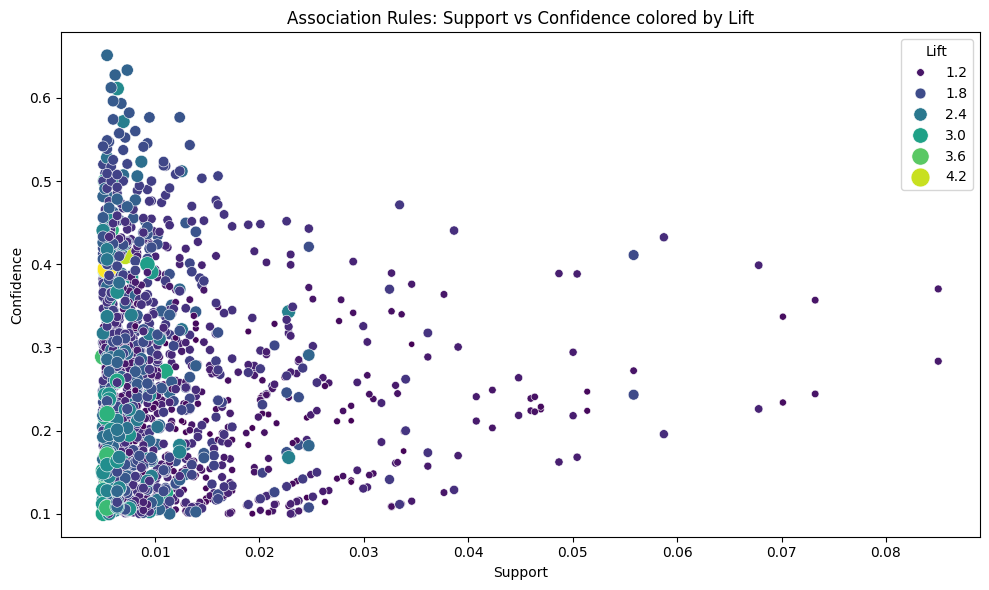

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the scatter plot
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=rules['support'], y=rules['confidence'], hue=rules['lift'], size=rules['lift'], sizes=(20, 200), palette='viridis')

# Label the axes and add a title
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Association Rules: Support vs Confidence colored by Lift')

# Add a legend for the hue (lift)
plt.legend(title='Lift', loc='best', bbox_to_anchor=(1, 1))

# Display the plot
plt.tight_layout()
plt.show()

In [9]:
# Filter rules based on higher confidence and lift
filtered_rules = rules[ (rules['confidence'] > 0.3) & (rules['lift'] > 1.5) ]

# Display the filtered rules, sorted by lift in descending order
print("Filtered Association Rules (Confidence > 0.3, Lift > 1.5) sorted by Lift:")
display(filtered_rules.sort_values(by='lift', ascending=False))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Filtered Association Rules (Confidence > 0.3, Lift > 1.5) sorted by Lift:


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3148,"(mineral water, whole wheat pasta)",(olive oil),0.013717,0.087713,0.005410,0.394366,4.496122,1.0,0.004206,1.506335,0.788401,0.056338,0.336137,0.228020
1018,(pasta),(shrimp),0.017388,0.098918,0.007148,0.411111,4.156076,1.0,0.005428,1.530139,0.772826,0.065487,0.346465,0.241688
1807,"(herb & pepper, chocolate)",(ground beef),0.013138,0.135819,0.005796,0.441176,3.248264,1.0,0.004012,1.546429,0.701357,0.040486,0.353349,0.241925
2807,"(herb & pepper, spaghetti)",(ground beef),0.023184,0.135819,0.009274,0.400000,2.945092,1.0,0.006125,1.440301,0.676127,0.061935,0.305701,0.234139
2609,"(soup, frozen vegetables)",(milk),0.011592,0.170015,0.005796,0.500000,2.940909,1.0,0.003825,1.659969,0.667709,0.032967,0.397579,0.267045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,"(low fat yogurt, pancakes)",(mineral water),0.013717,0.299845,0.006182,0.450704,1.503122,1.0,0.002069,1.274640,0.339373,0.020113,0.215465,0.235661
856,(light cream),(spaghetti),0.022411,0.229521,0.007728,0.344828,1.502380,1.0,0.002584,1.175994,0.342055,0.031646,0.149656,0.189249
2650,"(mineral water, frozen vegetables)",(spaghetti),0.050425,0.229521,0.017388,0.344828,1.502380,1.0,0.005814,1.175994,0.352146,0.066225,0.149656,0.210293
2201,"(mineral water, herb & pepper)",(eggs),0.024730,0.208076,0.007728,0.312500,1.501857,1.0,0.002582,1.151890,0.342631,0.034335,0.131861,0.174820


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [10]:
# Optionally, filter the rules further to include only those where specific items are present
# For example, rules involving 'spaghetti' or 'mineral water'
# interesting_item_rules = filtered_rules[
#     filtered_rules['antecedents'].apply(lambda x: 'spaghetti' in x or 'mineral water' in x) |
#     filtered_rules['consequents'].apply(lambda x: 'spaghetti' in x or 'mineral water' in x)
# ]

# If no further item filtering is needed, use the filtered_rules from the previous step
final_rules_for_analysis = filtered_rules

# Display the final filtered rules, sorted by lift in descending order
print("\nFinal Filtered Association Rules for Analysis (sorted by Lift):")
display(final_rules_for_analysis.sort_values(by='lift', ascending=False))

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag


Final Filtered Association Rules for Analysis (sorted by Lift):


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
3148,"(mineral water, whole wheat pasta)",(olive oil),0.013717,0.087713,0.005410,0.394366,4.496122,1.0,0.004206,1.506335,0.788401,0.056338,0.336137,0.228020
1018,(pasta),(shrimp),0.017388,0.098918,0.007148,0.411111,4.156076,1.0,0.005428,1.530139,0.772826,0.065487,0.346465,0.241688
1807,"(herb & pepper, chocolate)",(ground beef),0.013138,0.135819,0.005796,0.441176,3.248264,1.0,0.004012,1.546429,0.701357,0.040486,0.353349,0.241925
2807,"(herb & pepper, spaghetti)",(ground beef),0.023184,0.135819,0.009274,0.400000,2.945092,1.0,0.006125,1.440301,0.676127,0.061935,0.305701,0.234139
2609,"(soup, frozen vegetables)",(milk),0.011592,0.170015,0.005796,0.500000,2.940909,1.0,0.003825,1.659969,0.667709,0.032967,0.397579,0.267045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,"(low fat yogurt, pancakes)",(mineral water),0.013717,0.299845,0.006182,0.450704,1.503122,1.0,0.002069,1.274640,0.339373,0.020113,0.215465,0.235661
856,(light cream),(spaghetti),0.022411,0.229521,0.007728,0.344828,1.502380,1.0,0.002584,1.175994,0.342055,0.031646,0.149656,0.189249
2650,"(mineral water, frozen vegetables)",(spaghetti),0.050425,0.229521,0.017388,0.344828,1.502380,1.0,0.005814,1.175994,0.352146,0.066225,0.149656,0.210293
2201,"(mineral water, herb & pepper)",(eggs),0.024730,0.208076,0.007728,0.312500,1.501857,1.0,0.002582,1.151890,0.342631,0.034335,0.131861,0.174820


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:151: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag